#  Happiness Index (Introduction)




___


 <img src='images/cover.png' style="height: 200px;" />
 
 
___

## World Happiness Index Report

**Context**

The World Happiness Report is a universal survey on the state of global happiness. First published in 2012, it was updated until 2016. Since then, it has been used in various fields: economics, psychology, national statistics, healthcare, universal insurance, and others. 





Happiness scores use data from the Gallup World Poll. The scores are based on evaluations of main life issues assessed through survey questions, known as the Cantril ladder.

<img src='images/Cantril-Ladder.png' style="height: 400px;" />

The happiness score includes the following six factors determining survey results:

- Economy
- Social support
- Life expectancy
- Freedom
- Absence of corruption
- Well-being

These factors determine how happy people are in each country compared to people living in "dystopia.



**Inspiration**

<img src='images/Questions-Cover.jpg' style="height: 200px;" />

- Which countries or regions rank highest in overall happiness?
- Do these 6 factors affect happiness?
- Are the components of happiness correlated with suicide cases?
- Is it possible to predict the number of suicide cases if we know the components of the happiness index?

And other questions that will arise later.


**What is Dystopia?**

Dystopia is an imaginary country where the unhappiest people in the world live. Each surveyed person compares their situation to such a country, where there is the lowest income, minimal life expectancy, low well-being, high corruption, lack of freedom, and minimal social support. The comparison is made with the opposite of utopia, "dystopia."

<img src='images/DysUtopia.jpg' style="height: 300px;" />


**Which columns describe the Happiness Index?**

The following columns:

- GDP per Capita
- Family
- Life Expectancy
- Freedom
- Generosity
- Trust Government Corruption

Dystopia Residual is Dystopia Happiness Score (1.85) + Residual.

If you sum these factors, you will get the Happiness Score.


How the data looks

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the 2015 data
y_2015 = pd.read_csv('data/2015.csv')

In [7]:
# Let's look at the first five records


y_2015[0:10].style.set_properties(**{'background-color': 'red'}, subset=['Happiness Score'])


# Data Exploration


In [4]:
# Use seaborn styles:

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

**The impact of freedom on the happiness index:**

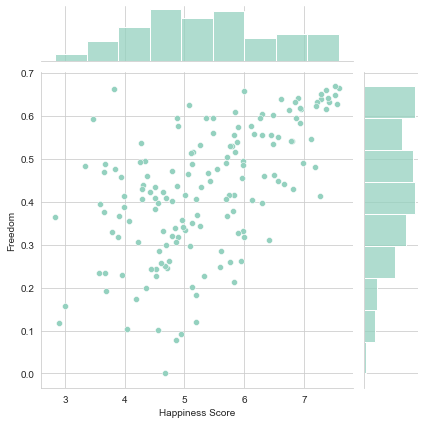

In [5]:
sns.jointplot(x='Happiness Score',y='Freedom',data=y_2015);

**The impact of economic conditions on happiness:**

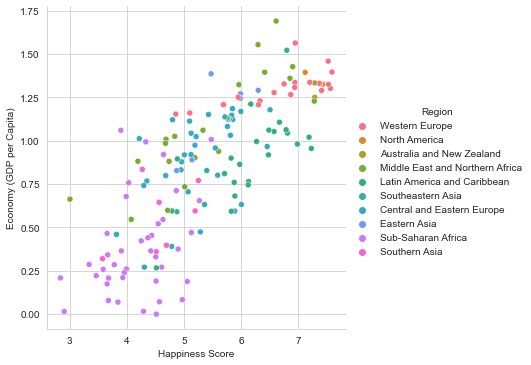

In [6]:


sns.relplot(x='Happiness Score',y='Economy (GDP per Capita)',data=y_2015,
            hue='Region');

**Let's build graphs of the interdependence of all parameters**

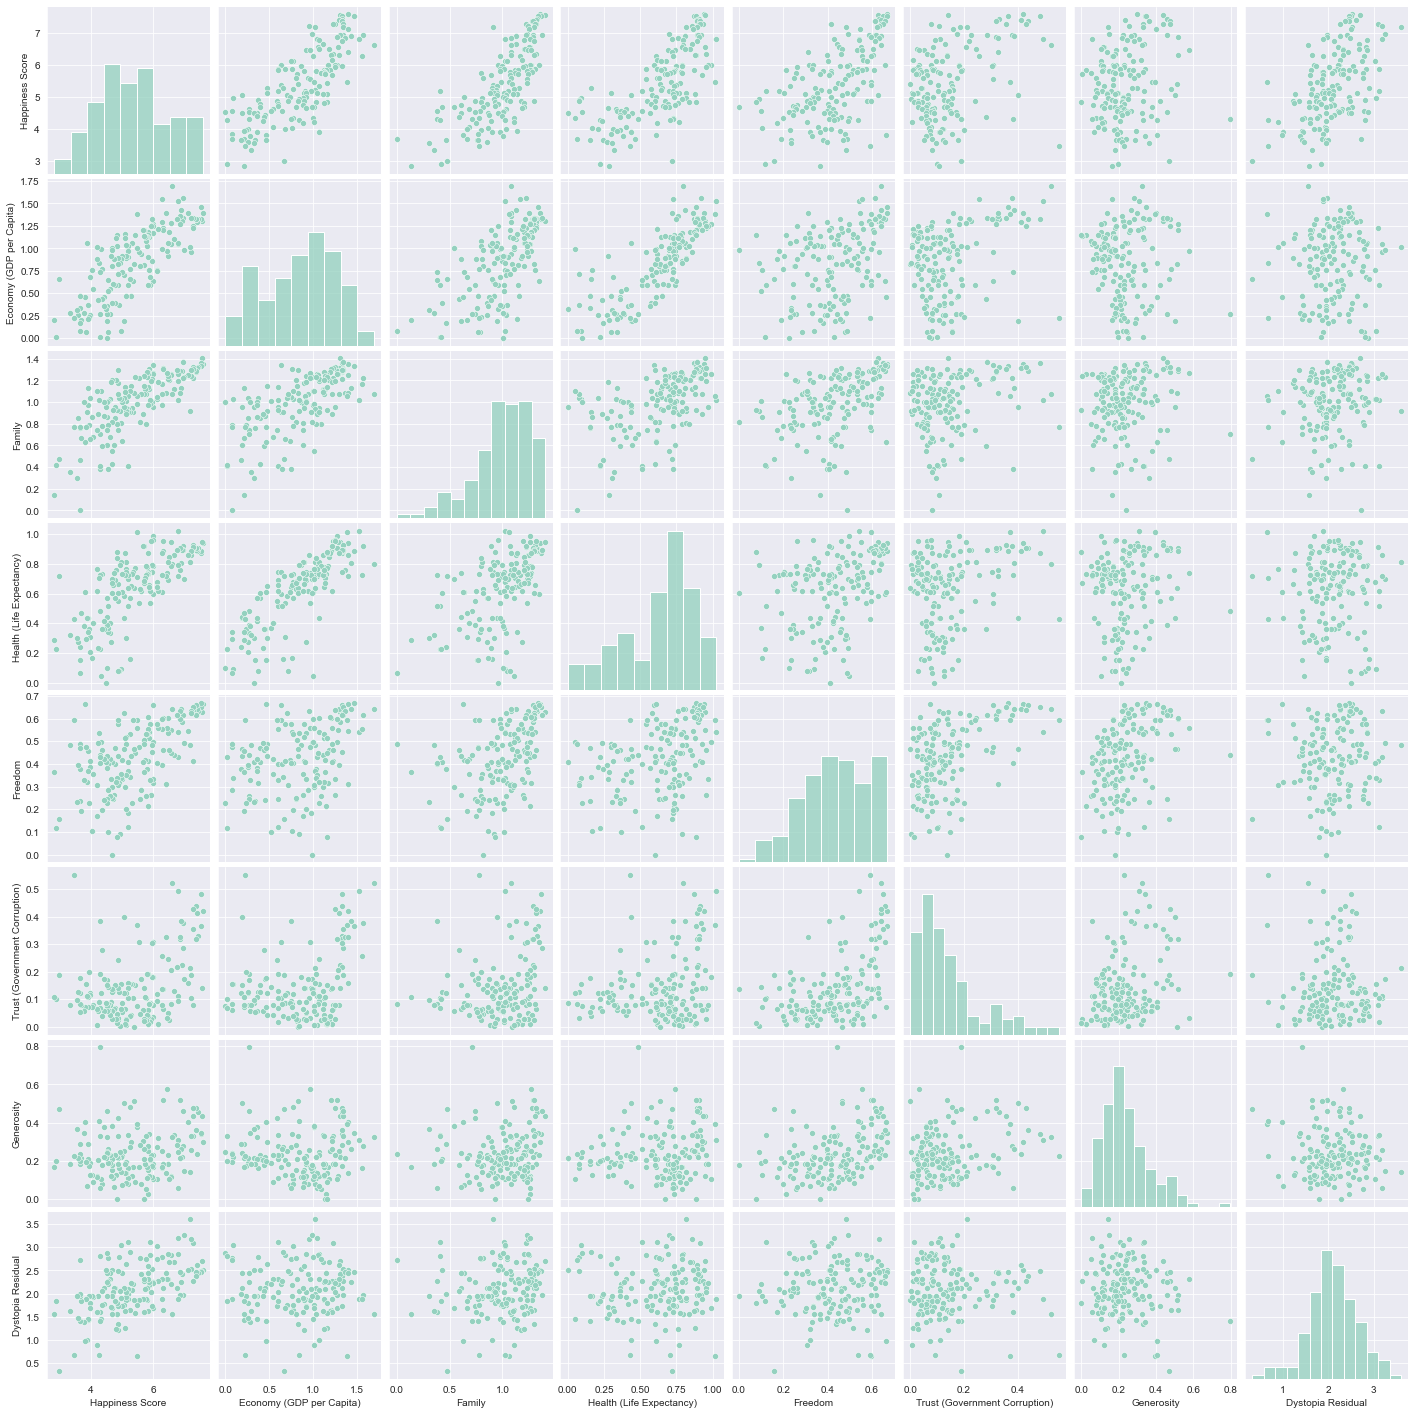

In [68]:
# Let's build graphs of the interdependence of all parameters:
    

sns.pairplot(y_2015[['Happiness Score',
       'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]);

**Create a linear model plot using lmplot to show the relationship between health and happiness**

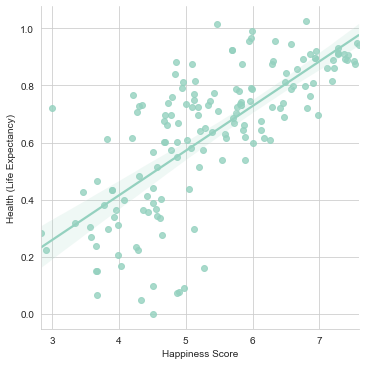

In [8]:
sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=y_2015);

Let's see the normal distribution of the Happiness Index:

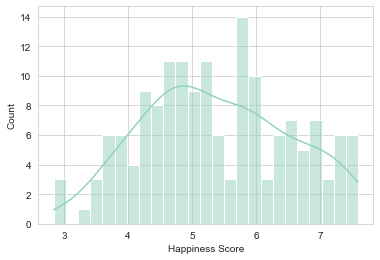

In [9]:


sns.histplot(y_2015['Happiness Score'],bins=25,kde=True);

Happiness Index by Region

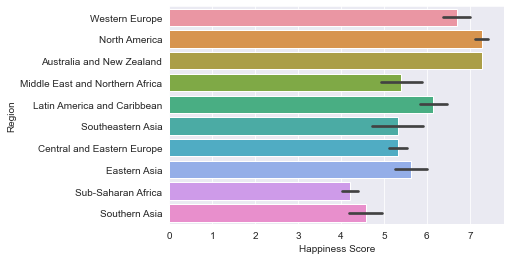

In [60]:
ax = sns.barplot(y="Region", x="Happiness Score", data=y_2015)

# Suicide Cases

In [10]:
# Import data on suicide cases by country and year:

suicide = pd.read_csv('data/share-deaths-suicide.csv')


In [11]:
# Rename the columns:

suicide=suicide[['Entity','Year','Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)']].rename(columns={'Entity':'Country','Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)':'suicide'})


In [12]:
# Keep only the data for the year 2015 and check the info
suicide_2015 = suicide[suicide['Year'] == 2015]
suicide_2015.head()

Country  Year   suicide
25            Afghanistan  2015  0.666678
53                Albania  2015  0.786902
81                Algeria  2015  1.048141
109        American Samoa  2015  1.086531
137  Andean Latin America  2015  1.128180

**Merge with our data**

In [13]:
# It seems there are no NaNs in the data, so we can merge the data:

df = pd.merge(y_2015, suicide_2015, on=['Country'])


In [14]:
# Drop the 'Year' column
df.drop(columns=['Year'], inplace=True)
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual   suicide  
0     0.29678            2.51738  1.827820  
1     0.43630            2.70201  1.884182  
2     0.34139            2.49204  1.281190  
3     0.34699            2.46531  1.429625  
4     0.45811            2.45176  1.753301

<AxesSubplot:>

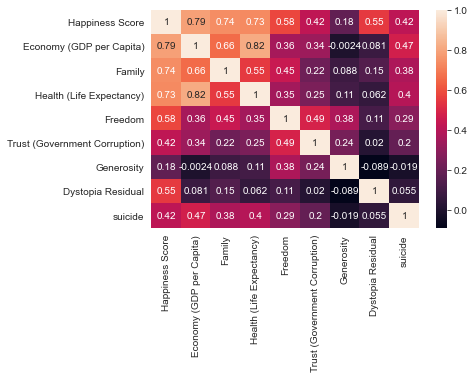

In [16]:
# Let's build a correlation map:
sns.heatmap(df[['Happiness Score',
       'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual','suicide']].corr(), annot=True)

**ვნახოთ უფრო ახლოდან თუ როგორ არის სუიციდიი და ბედნიერების ინდექსი ურთიერთდამოკიდებული**

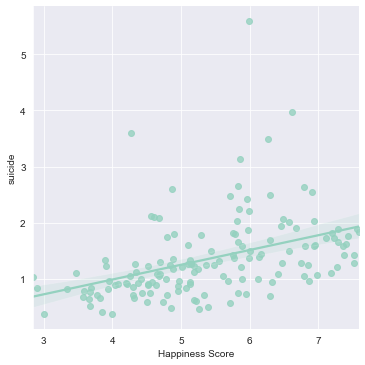

In [70]:
# Let's take a closer look at how suicide and the happiness index are interrelated
sns.lmplot(x='Happiness Score', y='suicide', data=df);

**Let's also compare it to the economic situation**

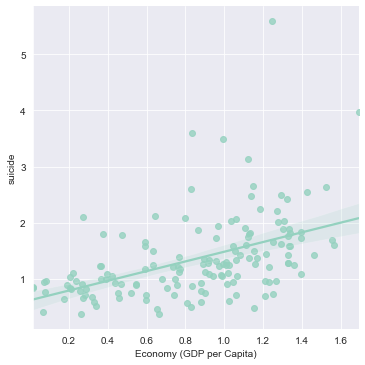

In [71]:
#ასევე შევადაროთ ეკონომიკურ მდგომარეობას
sns.lmplot(x='Economy (GDP per Capita)',y='suicide',data=df);

**As seen from the graphs, there is a slight but noticeable correlation between suicide and economic conditions.
This means that in economically developed countries, there were proportionally more cases of suicide during the surveyed period.**


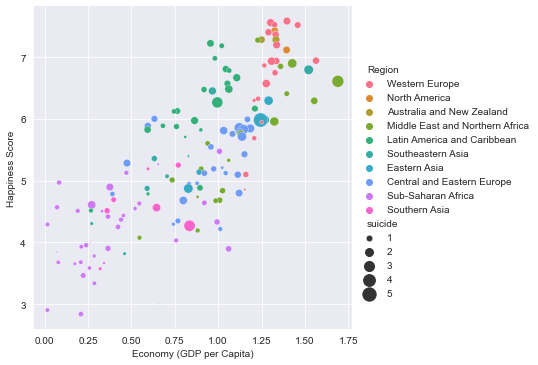

In [72]:
sns.relplot(data=df,x='Economy (GDP per Capita)',y='Happiness Score',hue='Region',size="suicide",sizes=(1, 200));

In [20]:
df.sort_values("suicide",ascending=False).head(10)

Country                           Region  Happiness Rank  \
45            South Korea                     Eastern Asia              47   
27                  Qatar  Middle East and Northern Africa              28   
122             Sri Lanka                    Southern Asia             132   
38               Suriname      Latin America and Caribbean              40   
52             Kazakhstan       Central and Eastern Europe              54   
54              Lithuania       Central and Eastern Europe              56   
23              Singapore                Southeastern Asia              24   
93               Mongolia                     Eastern Asia             100   
19   United Arab Emirates  Middle East and Northern Africa              20   
36                 Taiwan                     Eastern Asia              38   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
45             5.984         0.04098                   1.24461  0.95774   
27             6.611         0.06257                   1.69042  1.07860   
122            4.271         0.03751                   0.83524  1.01905   
38             6.269         0.09811                   0.99534  0.97200   
52             5.855         0.04114                   1.12254  1.12241   
54             5.833         0.03843                   1.14723  1.25745   
23             6.798         0.03780                   1.52186  1.02000   
93             4.874         0.03313                   0.82819  1.30060   
19             6.901         0.03729                   1.42727  1.12575   
36             6.298         0.03868                   1.29098  1.07617   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
45                    0.96538  0.33208                        0.07857   
27                    0.79733  0.64040                        0.52208   
122                   0.70806  0.53726                        0.09179   
38                    0.60820  0.59657                        0.13633   
52                    0.64368  0.51649                        0.08454   
54                    0.73128  0.21342                        0.01031   
23                    1.02525  0.54252                        0.49210   
93                    0.60268  0.43626                        0.02666   
19                    0.80925  0.64157                        0.38583   
36                    0.87530  0.39740                        0.08129   

     Generosity  Dystopia Residual   suicide  
45      0.18557            2.21978  5.595541  
27      0.32573            1.55674  3.970951  
122     0.40828            0.67108  3.597424  
38      0.16991            2.79094  3.492400  
52      0.11827            2.24729  3.132291  
54      0.02641            2.44649  2.655972  
23      0.31105            1.88501  2.641140  
93      0.33230            1.34759  2.599839  
19      0.26428            2.24743  2.540437  
36      0.25376            2.32323  2.499941

# 2015-2020  პერიოდის ანალიზი

In [21]:
y_2016 = pd.read_csv('data/2016.csv')
y_2017 = pd.read_csv('data/2017.csv')
y_2018 = pd.read_csv('data/2018.csv')
y_2019 = pd.read_csv('data/2019.csv')
y_2020 = pd.read_csv('data/2020.csv')

### ვნახოთ როგორ იცვლებოდა ჯანმრთელობის ინდექსი წლების განმაცლობაში

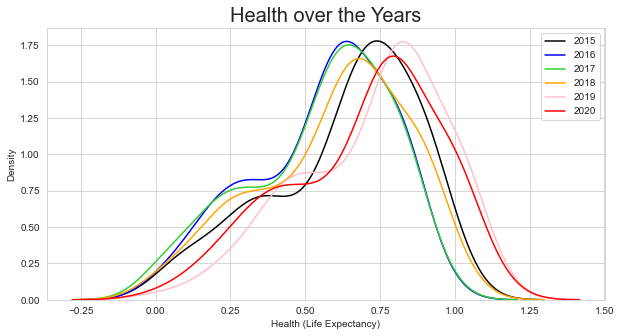

In [22]:
plt.figure(figsize=(10,5))
sns.kdeplot(y_2015['Health (Life Expectancy)'],color='black')
sns.kdeplot(y_2016['Health (Life Expectancy)'],color='blue')
sns.kdeplot(y_2017['Health..Life.Expectancy.'],color='limegreen')
sns.kdeplot(y_2018['Healthy life expectancy'],color='orange')
sns.kdeplot(y_2019['Healthy life expectancy'],color='pink')
sns.kdeplot(y_2020['Explained by: Healthy life expectancy'],color='red')
plt.title('Health over the Years',size=20)
plt.legend([2015,2016,2017,2018,2019,2020])
plt.show()

### ბედნიერების ინდექსის ცვლილება :

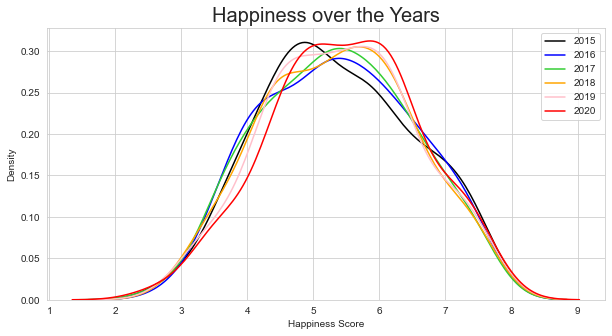

In [23]:
plt.figure(figsize=(10,5))
sns.kdeplot(y_2015['Happiness Score'],color='black')
sns.kdeplot(y_2016['Happiness Score'],color='blue')
sns.kdeplot(y_2017['Happiness.Score'],color='limegreen')
sns.kdeplot(y_2018['Score'],color='orange')
sns.kdeplot(y_2019['Score'],color='pink')
sns.kdeplot(y_2020['Ladder score'],color='red')
plt.title('Happiness over the Years',size=20)
plt.legend([2015,2016,2017,2018,2019,2020])
plt.show()

#  Geopandas-ს გამოყენებით რუკაზე მონაცემების გამოსახვა

In [24]:
import geopandas as gpd
sns.set_style("darkgrid")
import math
map_df = gpd.read_file('data/World_Countries__Generalized_.shp',)
map_df = map_df.replace({'Russian Federation':'Russia',
                        'Trinidad and Tobago': 'Trinidad & Tobago',
                        "Côte d'Ivoire": 'Ivory Coast',
                        'Congo': 'Congo (Brazzaville)',
                        'Congo DRC':'Congo (Kinshasa)',
                        'Palestinian Territory':'Palestinian Territories'})


In [25]:
data_2018 = y_2018.rename(index = str, columns = {'Country or region':"Country"})
df_2018 = data_2018[['Country','Score']]
merged = map_df.set_index('COUNTRY').join(df.set_index('Country'))

In [26]:
variable = 'Score'

vmin, vmax = 2.853,7.021 

In [27]:
df_2018=df_2018.set_index('Country').T.to_dict('list')
updates = {'Maldives':[5.20],
          'Oman':[6.853],
          'Sudan':[4.14],
          'Djibouti':[4.37],
          'Angola':[3.80],
          'Belize':[5.95599985122681]
          }
df_2018.update(updates)

In [28]:
for i in range (len(merged)):
    if math.isnan(merged['Happiness Score'][i]):
        if (str(merged['COUNTRYAFF'][i])) in df_2018:
            merged['Happiness Score'][i] = float(df_2018[str(merged['COUNTRYAFF'][i])][0])

merged.head(5)

<ipython-input-28-53412ebec0e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['Happiness Score'][i] = float(df_2018[str(merged['COUNTRYAFF'][i])][0])


FID ISO     COUNTRYAFF AFF_ISO  \
COUNTRY                                                                
American Samoa                          1  AS  United States      US   
United States Minor Outlying Islands    2  UM  United States      US   
Cook Islands                            3  CK    New Zealand      NZ   
French Polynesia                        4  PF         France      FR   
Niue                                    5  NU    New Zealand      NZ   

                                      SHAPE_Leng  SHAPE_Area  \
COUNTRY                                                        
American Samoa                          0.600124    0.013720   
United States Minor Outlying Islands    0.480216    0.003216   
Cook Islands                            0.980664    0.013073   
French Polynesia                        3.930211    0.175332   
Niue                                    0.541413    0.021414   

                                                                               geometry  \
COUNTRY                                                                                   
American Samoa                        POLYGON ((-170.74390 -14.37555, -170.74942 -14...   
United States Minor Outlying Islands  MULTIPOLYGON (((-160.02114 -0.39805, -160.0281...   
Cook Islands                          MULTIPOLYGON (((-159.74698 -21.25667, -159.793...   
French Polynesia                      MULTIPOLYGON (((-149.17920 -17.87084, -149.258...   
Niue                                  POLYGON ((-169.89389 -19.14556, -169.93088 -19...   

                                     Region  Happiness Rank  Happiness Score  \
COUNTRY                                                                        
American Samoa                          NaN             NaN            6.886   
United States Minor Outlying Islands    NaN             NaN            6.886   
Cook Islands                            NaN             NaN            7.324   
French Polynesia                        NaN             NaN            6.489   
Niue                                    NaN             NaN            7.324   

                                      Standard Error  \
COUNTRY                                                
American Samoa                                   NaN   
United States Minor Outlying Islands             NaN   
Cook Islands                                     NaN   
French Polynesia                                 NaN   
Niue                                             NaN   

                                      Economy (GDP per Capita)  Family  \
COUNTRY                                                                  
American Samoa                                             NaN     NaN   
United States Minor Outlying Islands                       NaN     NaN   
Cook Islands                                               NaN     NaN   
French Polynesia                                           NaN     NaN   
Niue                                                       NaN     NaN   

                                      Health (Life Expectancy)  Freedom  \
COUNTRY                                                                   
American Samoa                                             NaN      NaN   
United States Minor Outlying Islands                       NaN      NaN   
Cook Islands                                               NaN      NaN   
French Polynesia                                           NaN      NaN   
Niue                                                       NaN      NaN   

                                      Trust (Government Corruption)  \
COUNTRY                                                               
American Samoa                                                  NaN   
United States Minor Outlying Islands                            NaN   
Cook Islands                                                    NaN   
French Polynesia                                                NaN   
Niue                 

Text(0.5, 1.0, 'World Happiness Score')

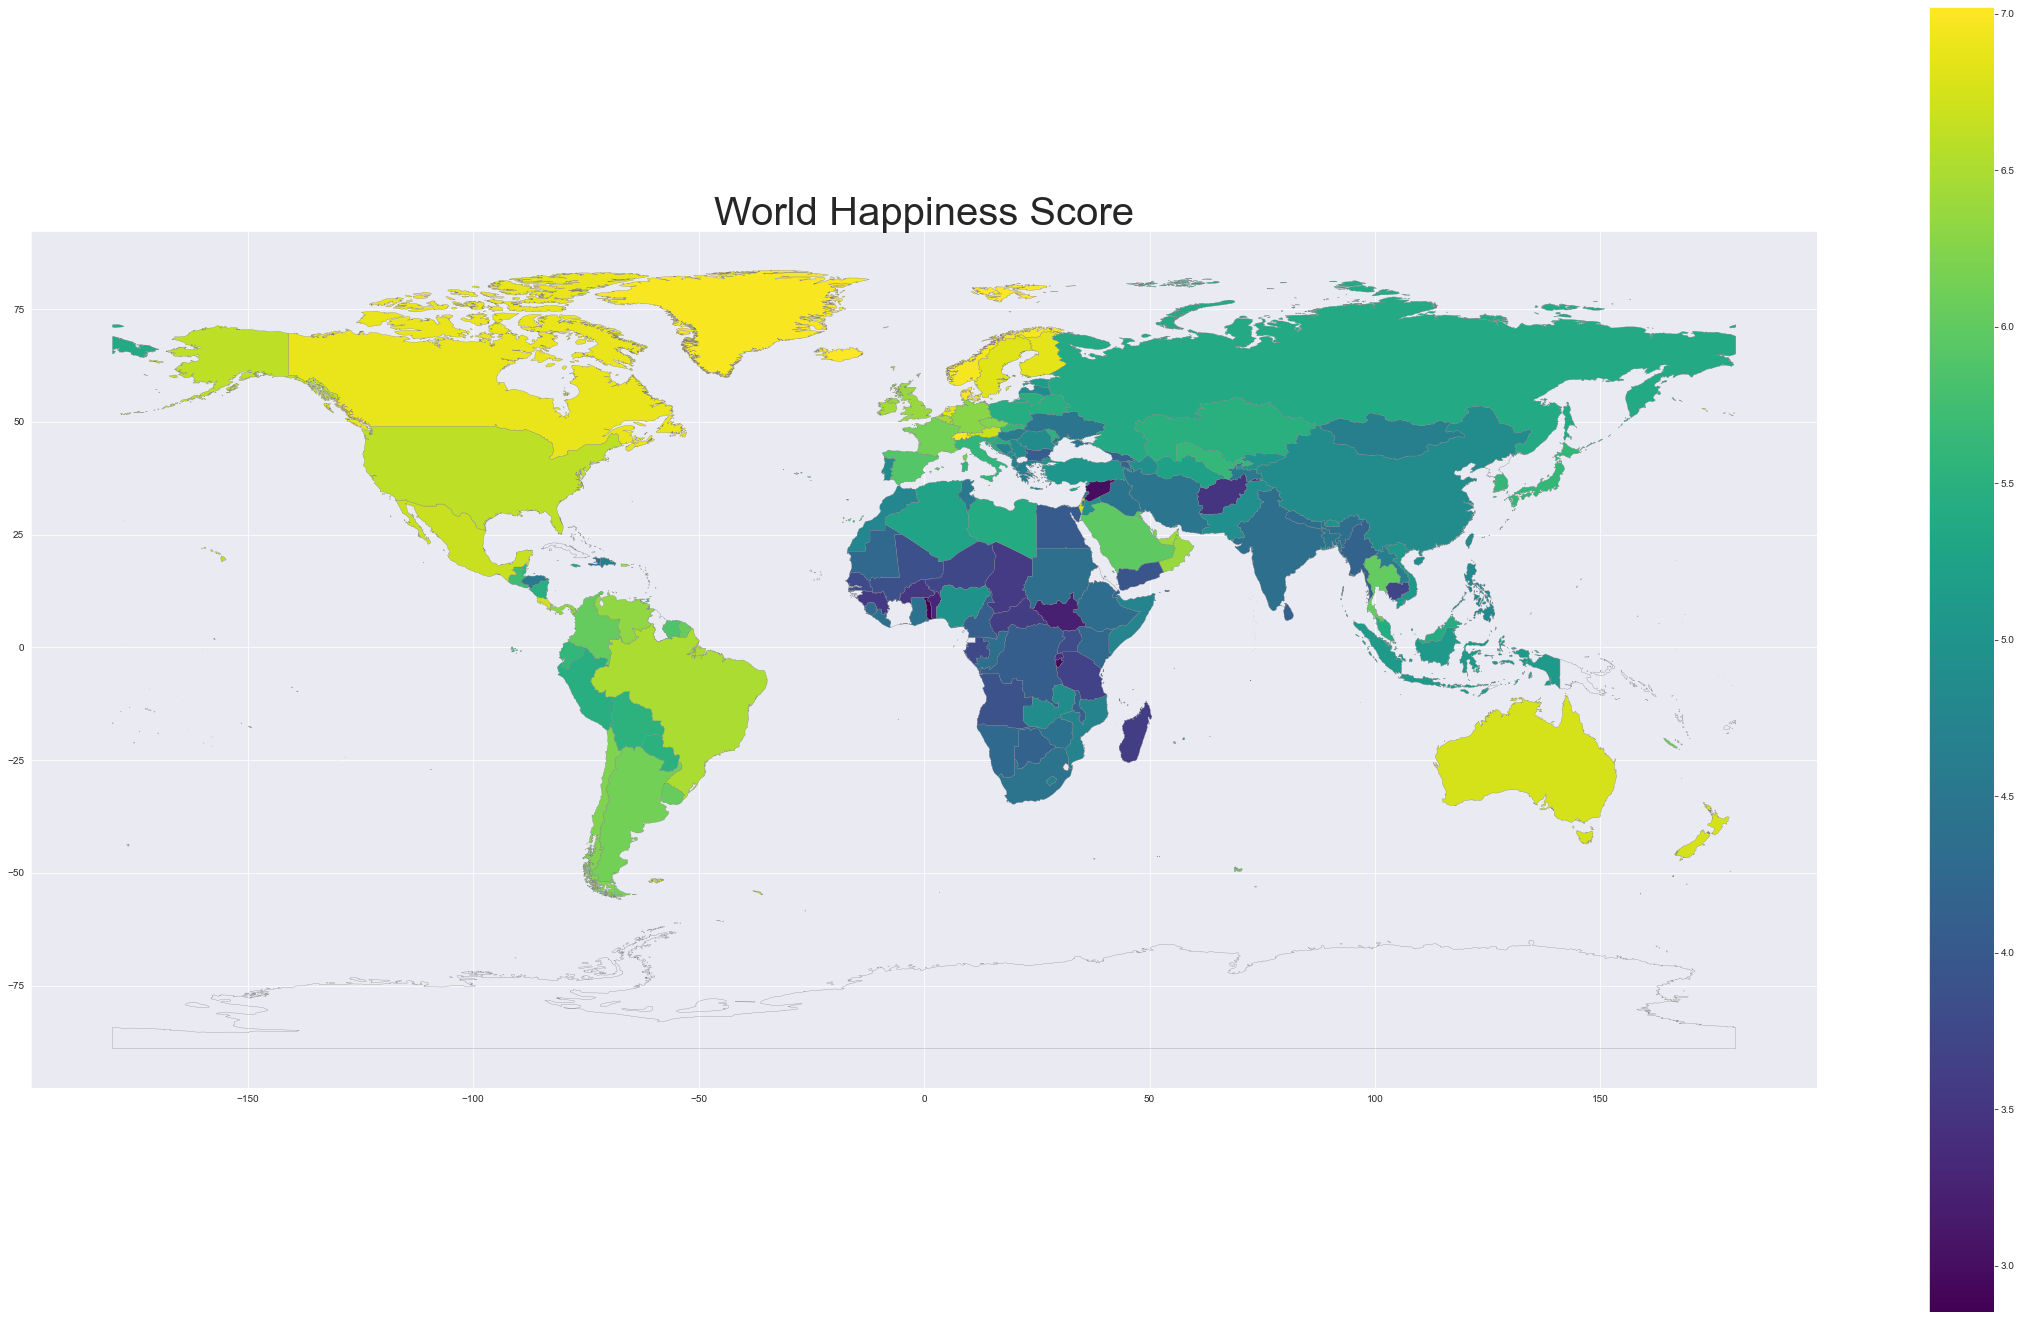

In [29]:
fig,ax = plt.subplots(1,figsize = (40,24))
sm = plt.cm.ScalarMappable(cmap='viridis',norm = plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

merged.plot(column = 'Happiness Score', cmap = 'viridis', linewidth = 0.3, ax=ax,edgecolor = '0.5')
ax.set_title('World Happiness Score',fontdict = {'fontsize':'40'})

Text(0.5, 1.0, 'World Suicide rate')

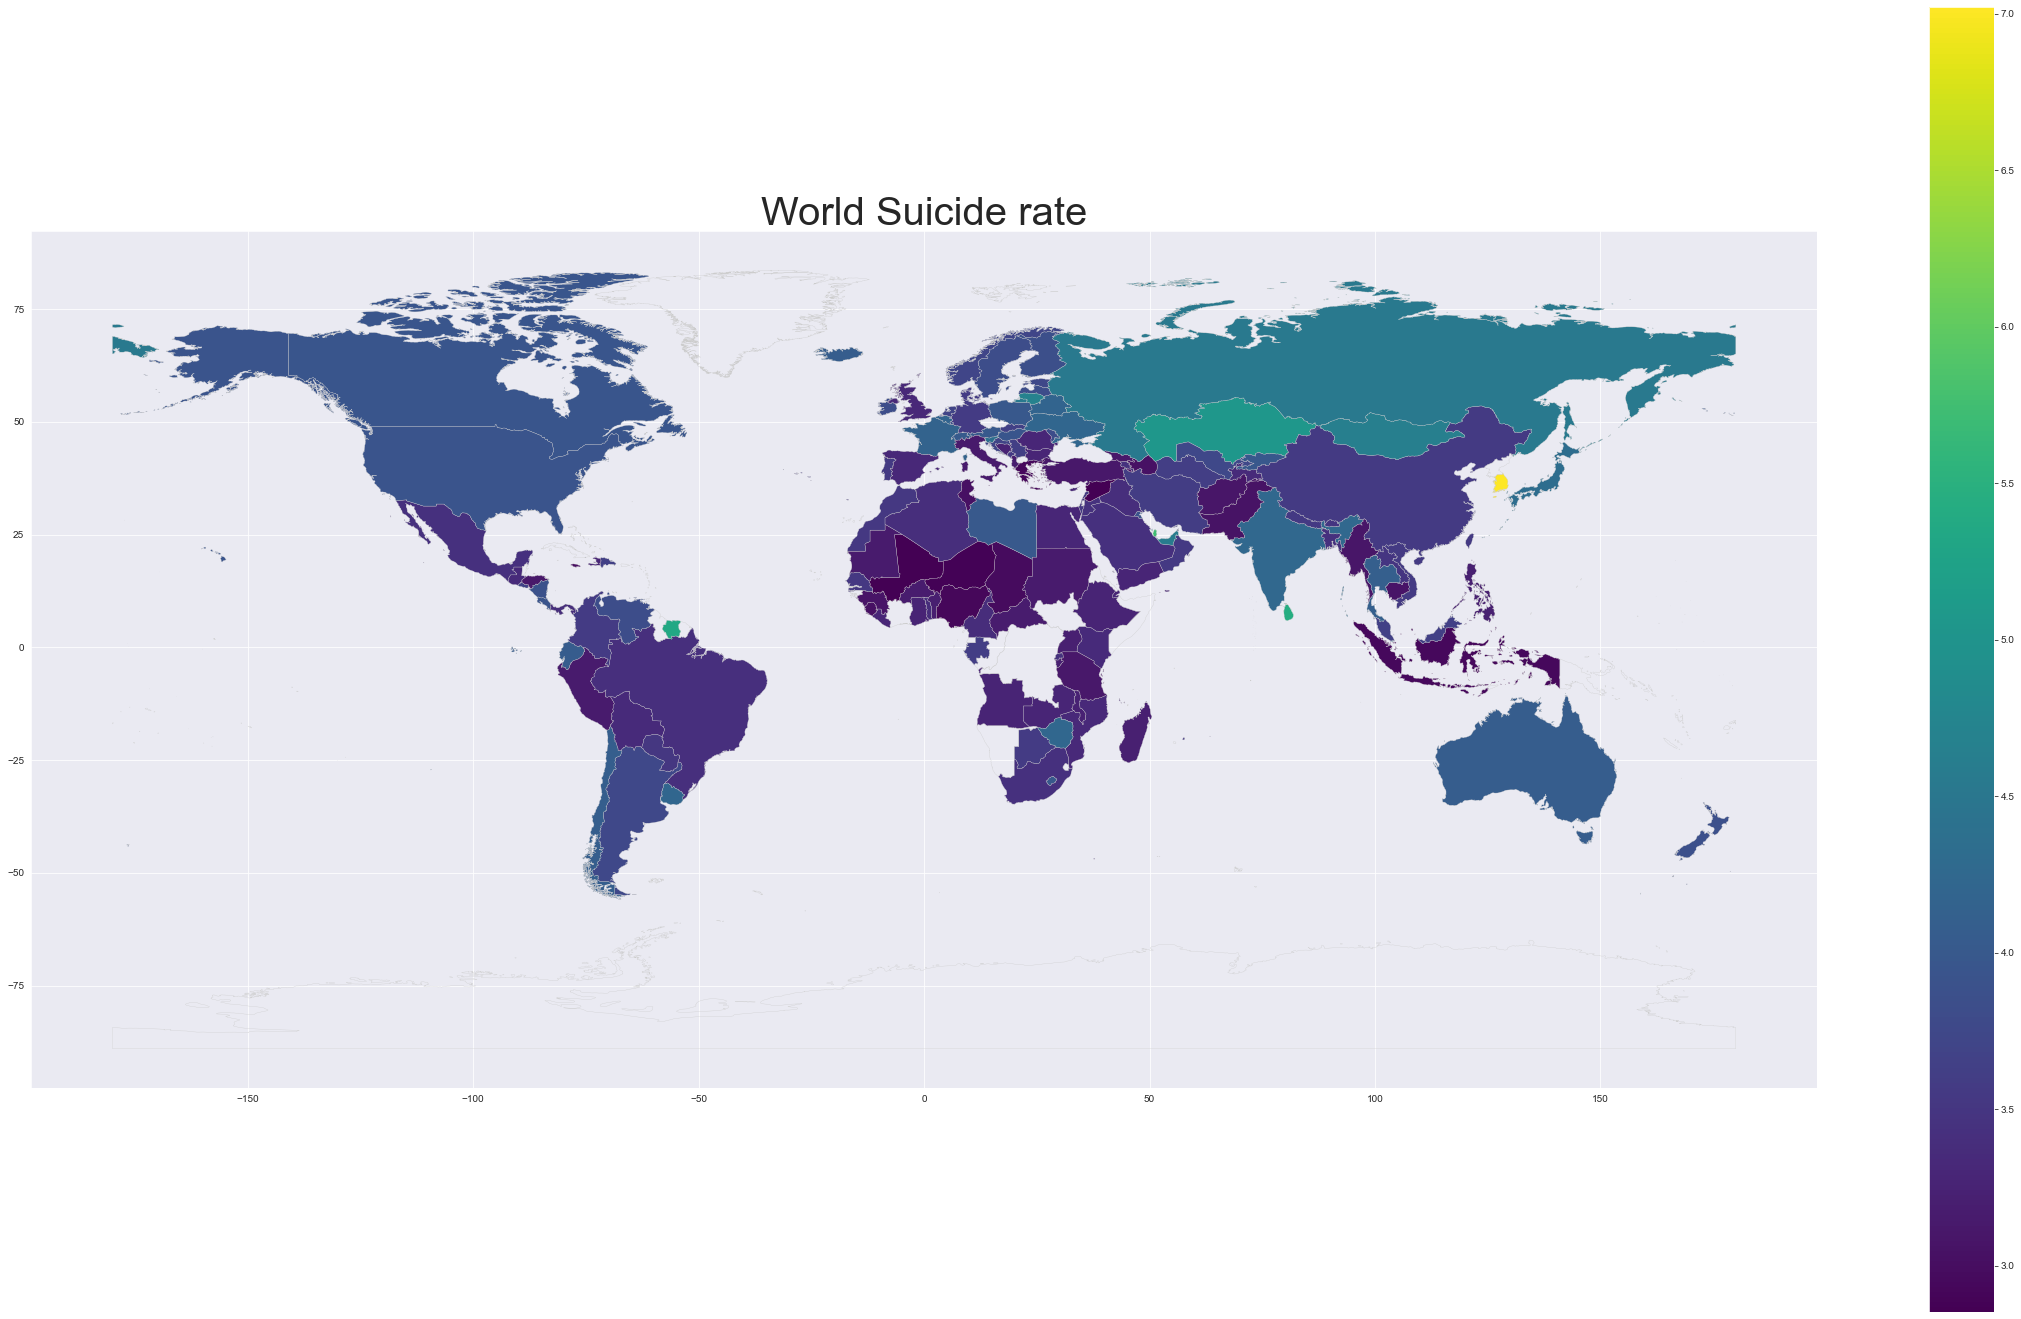

In [30]:
variable='suicide'
fig,ax = plt.subplots(1,figsize = (40,24))
sm = plt.cm.ScalarMappable(cmap='viridis',norm = plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

merged.plot(column = variable, cmap = 'viridis', linewidth = 0.3, ax=ax,edgecolor = '0.8')
ax.set_title('World Suicide rate',fontdict = {'fontsize':'40'})

# რელიგიურობა

In [31]:
rel_data = pd.read_csv('data/religios_GDP.csv')
rel_data=rel_data.rename(columns={"country":"Country"})
rel_data


Unnamed: 0      Country  religiousity%    US$
0             0       Angola             88   4465
1             1       Brazil             79   9895
2             2     Bulgaria             52   8077
3             3     Colombia             82   6379
4             4     Tanzania             89   1034
..          ...          ...            ...    ...
143         143       Rwanda             95    772
144         144  Puerto Rico             85  31581
145         145        Qatar             95  61024
146         146         Togo             80    611
147         147       Taiwan             45  24292

[148 rows x 4 columns]

In [32]:
df_rel = pd.merge(df, rel_data, on=['Country'])

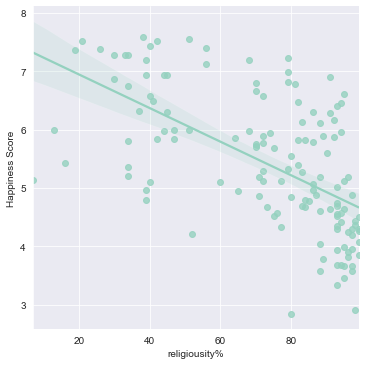

In [33]:
sns.lmplot(y='Happiness Score',x='religiousity%',data=df_rel);

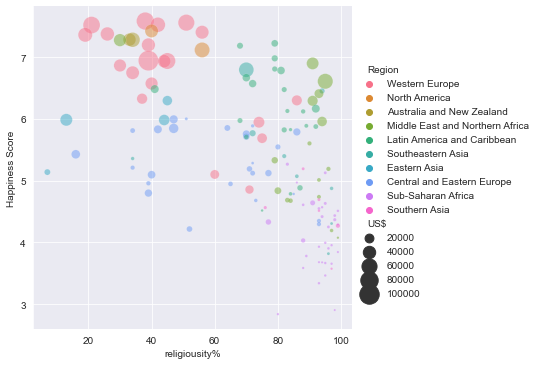

In [34]:
sns.relplot(data=df_rel,x='religiousity%',y='Happiness Score',hue='Region',size="US$",sizes=(5, 400),alpha=0.5);

In [35]:
import plotly.express as px


fig = px.scatter(df_rel, x="religiousity%", y="Happiness Score",color='Region',size='US$',hover_name='Country')
fig.show()
fig.write_html("plotly/file.html")

# Covid-ის მონაცემები 1000 000 ადამიანზე

In [36]:
covid = pd.read_csv('data/covid.csv')
covid=covid.rename(columns={"Unnamed: 3":"covid"})
covid=covid[['Country','covid']]
covid.dropna(inplace=True)
covid

Country       covid
1    Afghanistan    1,427.73
2         Africa    2,846.00
3        Albania   34,422.13
4        Algeria    2,548.70
5        Andorra  138,109.11
..           ...         ...
194      Vietnam       24.31
195        World   14,249.67
196        Yemen       72.29
197       Zambia    4,019.37
198     Zimbabwe    2,406.46

[198 rows x 2 columns]

In [37]:
y_2020=y_2020.rename(columns={"Country name":"Country",'Ladder score':'Happiness score'})

In [38]:
cov_data = pd.merge(covid, y_2020, on=['Country'])

In [39]:
cov_data['covid']=cov_data['covid'].str.replace(',', '')

In [66]:
test=cov_data[['covid','Happiness score']];
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() ;
scaled_values = scaler.fit_transform(test);
test.loc[:,:] = scaled_values;


C:\Users\zurab\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zurab\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
cov_data['covid']=test['covid']

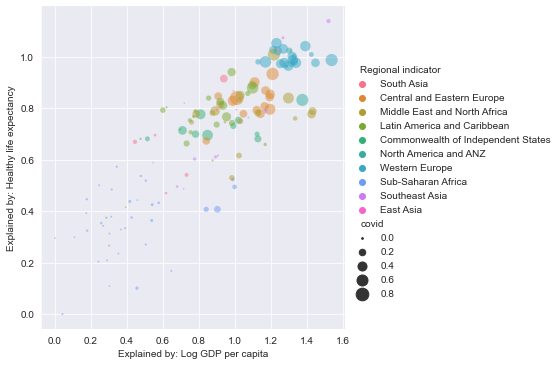

In [43]:

sns.relplot(data=cov_data,x='Explained by: Log GDP per capita',y='Explained by: Healthy life expectancy',
            hue='Regional indicator',size="covid",sizes=(3, 200),alpha=0.5);

# წრფივი რეგრესიის მოდელი

In [44]:
dum_df = pd.get_dummies(df, columns=["Region"])

In [45]:
X=dum_df.drop(columns=["Country",'Happiness Rank','Trust (Government Corruption)','Standard Error','Happiness Score'])

In [46]:
y=dum_df['Happiness Score']

In [47]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09184139883084416
Mean Squared Error: 0.013109356769966943
Root Mean Squared Error: 0.11449609936572924


<ipython-input-50-73d758206e49>:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



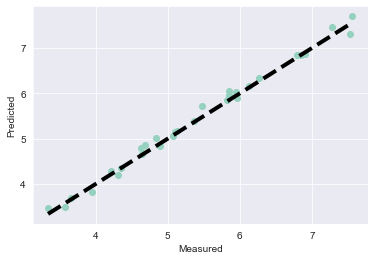

In [50]:
fig,ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

In [51]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9940367076549931


In [52]:

suicide_2016=suicide[suicide['Year']==2016]
df_2016 = pd.merge(y_2015, suicide_2015, on=['Country'])
df_2016.drop(columns=['Year'],inplace=True)
dum_df_2016 = pd.get_dummies(df_2016, columns=["Region"])


In [53]:
dum_df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'suicide', 'Region_Australia and New Zealand',
       'Region_Central and Eastern Europe', 'Region_Eastern Asia',
       'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe'],
      dtype='object')

In [54]:
# X_train=dum_df.drop(columns=["Country",'Happiness Rank','Trust (Government Corruption)','Standard Error','Happiness Score'])
# y_train=dum_df['suicide']

X_test=dum_df_2016.drop(columns=["Country",'Happiness Rank','Trust (Government Corruption)','Standard Error','Happiness Score'])
y_test=dum_df_2016['Happiness Score']





# model_2 = LinearRegression()
# model_2.fit(X_train, y_train)


In [55]:
y_pred = model.predict(X_test)

In [56]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0754315865740917
Mean Squared Error: 0.009057826512209627
Root Mean Squared Error: 0.09517261429744182


<ipython-input-57-642a7a46ea6b>:7: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



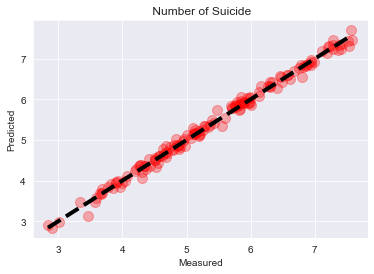

In [57]:
fig,ax = plt.subplots()
ax.scatter(y_test, y_pred,alpha=0.3,c='r',s=100)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title(' Number of Suicide')
fig.show()

In [58]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9940367076549931



 
 <img src='images/suicide.png' style="height: 200px;" />